In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import TweetTokenizer
trump_dat = pandas.read_json('./trumptweets.json')

In [2]:
tweets = trump_dat['text']

tknzr = TweetTokenizer()
word_dict = {}
start_list = {}
for i in range(len(tweets)):
    words = tknzr.tokenize(tweets[i])
    words.append('eot')
    if words[1] not in start_list: # dictionary for starting words
        start_list[words[1]] = 1
    else:
        start_list[words[1]] += 1
    for j in range(len(words)-1):
        w1 = words[j]
        w2 = words[j+1]
        if w1 not in word_dict:
            word_dict[w1] = {w2:1}
        else:
            if w2 not in word_dict[w1]:
                word_dict[w1][w2] = 1
            else:
                word_dict[w1][w2] += 1

                
start = []
p_start = []
for x, y in start_list.items():
    start.append(x)
    p_start.append(y)
p_start = list(p_start/np.sum(p_start))

In [3]:
def gen_tweet(start,p_start,word_dict):
    flag = 1
    while flag:
        try:
            tweet = np.random.choice(start,p=p_start).capitalize()
            temp = tweet
            while temp!='eot':
                pairs = word_dict[temp].items()
                p_next = []
                next_word = []
                for x,y in pairs:
                    next_word.append(x)
                    p_next.append(y)
                p_next = list(p_next/np.sum(p_next))
                temp = np.random.choice(next_word,p=p_next)
                if temp in '''%'’,;.!?''':
                    tweet += temp
                elif tweet[-1] in '.!?':
                    tweet += ' ' + temp.capitalize()
                else:
                    tweet += ' ' + temp
        except:
            flag = 1
        if len(tweet) <= 255:
            flag = 0
    return(tweet[:-4])

In [4]:
for i in range(5):
    print('Trump tweet %d:' % (i+1))
    print(gen_tweet(start,p_start,word_dict))
    print('\n')

Trump tweet 1:
Jim Mattis did ... Used this rally that?


Trump tweet 2:
#trump


Trump tweet 3:
Is he sought dirt on Border. Https://t.co/samljsz1nt


Trump tweet 4:
Claims' s official Bruce Ohr, Florida.


Trump tweet 5:
You can continue to Kelly said NO, even got fired from the families, co-signed loan. " - GREAT AGAIN! Let these college graduates want to serve us today’ s failed Th …




In [5]:
trials = 10000
n_words = np.zeros((trials,1))
n_char = np.zeros((trials,1))
for i in range(trials):
    tweet = gen_tweet(start,p_start,word_dict)
    n_words[i] = len(tweet.split())
    n_char[i] = len(tweet)

mean words per tweet = 13 
 std = 12
mean characters per tweet = 79 
 std = 71


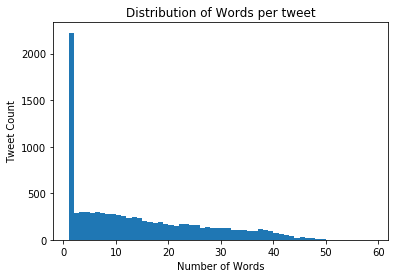

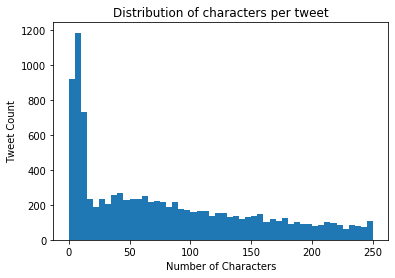

In [6]:
print('mean words per tweet = %.0f \n std = %.0f' % (np.mean(n_words),np.std(n_words)))
print('mean characters per tweet = %.0f \n std = %.0f' % (np.mean(n_char),np.std(n_char)))
plt.hist(n_words,bins=range(1,60,1))
plt.title('Distribution of Words per tweet')
plt.ylabel('Tweet Count')
plt.xlabel('Number of Words')
plt.show()
plt.hist(n_char,bins=range(0,255,5))
plt.title('Distribution of characters per tweet')
plt.ylabel('Tweet Count')
plt.xlabel('Number of Characters')
plt.show()